**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from scipy.spatial.distance import cdist

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [3]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes = len(np.unique(y))
        
    def brute(self, X):
        distances = cdist(X, self.X_train, metric=self.metric)
        indexes = np.argpartition(distances, self.n_neighbors, axis=1)[:,:self.n_neighbors]
        return np.apply_along_axis(np.bincount, 1, self.y_train[indexes], minlength = self.classes).argmax(axis=1)
    
    def kd_tree(self, root):
        X = np.concatenate((np.expand_dims(root, axis=0), self.X_train), axis=0)
        tree = KDTree(X, metric=self.metric)
        indexes = tree.query(X[:1], self.n_neighbors + 1)[1].ravel()[1:] - 1
        return np.bincount(self.y_train[indexes]).argmax()
        
    def predict(self, X):
        if self.algorithm == 'brute':
            return self.brute(X)
        elif self.algorithm == 'kd_tree':
            return np.apply_along_axis(self.kd_tree, 1, X)

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 725 µs, sys: 177 µs, total: 902 µs
Wall time: 772 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 105 µs, sys: 47 µs, total: 152 µs
Wall time: 129 µs


In [11]:
%time clf.predict(X_test)

CPU times: user 3.38 ms, sys: 894 µs, total: 4.27 ms
Wall time: 3.42 ms


array([1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1])

In [12]:
%time my_clf.predict(X_test)

CPU times: user 950 µs, sys: 606 µs, total: 1.56 ms
Wall time: 938 µs


array([1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [13]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [15]:
%time clf.fit(X_train, y_train)

CPU times: user 1.08 ms, sys: 691 µs, total: 1.77 ms
Wall time: 4.71 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 101 µs, sys: 45 µs, total: 146 µs
Wall time: 115 µs


In [17]:
%time clf.predict(X_test)

CPU times: user 4.1 ms, sys: 1.95 ms, total: 6.05 ms
Wall time: 6.62 ms


array([2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0])

In [18]:
%time my_clf.predict(X_test)

CPU times: user 6.74 ms, sys: 1.17 ms, total: 7.92 ms
Wall time: 6.98 ms


array([2, 2, 2, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0])

In [19]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [20]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [21]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [22]:
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [23]:
clf = KNeighborsClassifier(n_neighbors=2)
cross_val_score(clf, X_count, target, cv=3)

array([0.18345705, 0.18430125, 0.18111907])

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

### Count Euclidean

[0.2059397  0.18295912 0.18128001 0.1822527  0.18304798 0.18349016
 0.1861417  0.18684878 0.19073783 0.19126791]
The best:  1


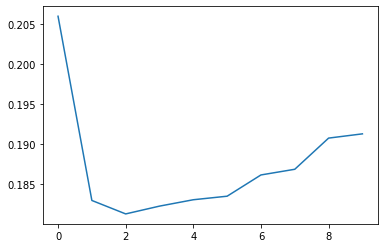

In [24]:
res = np.array([np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=i+1), X_count, target, cv=3)) for i in range(10)])
print(res)
print("The best: ", res.argmax() + 1)
plt.plot(res)
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

### Count Cosine

[0.29193919 0.27116802 0.26568797 0.26268286 0.26020858 0.25808748
 0.25835243 0.25525927 0.2519004  0.24730443]
The best:  1


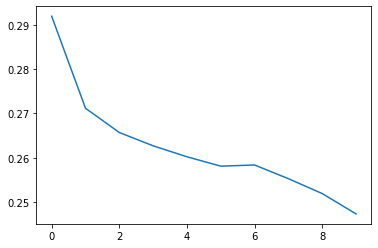

In [25]:
res_cosine = np.array([np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=i+1, metric="cosine"), X_count, target, cv=3)) for i in range(10)])
print(res_cosine)
print("The best: ", res_cosine.argmax() + 1)
plt.plot(res_cosine)
plt.show()

In [26]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data)

### TFidf Euclidean

[0.14831193 0.09510338 0.08705944 0.09793182 0.09333579 0.09315874
 0.09139096 0.08909302 0.08617588 0.08325928]
The best:  1


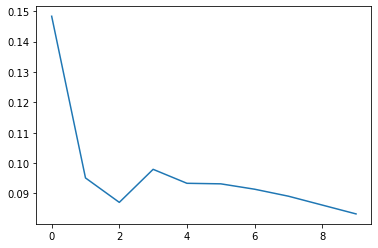

In [27]:
res_tfidf = np.array([np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=i+1), X_tfidf, target, cv=3)) for i in range(10)])
print(res_tfidf)
print("The best: ", res_tfidf.argmax() + 1)
plt.plot(res_tfidf)
plt.show()

### TFidf Cosine

[0.59554631 0.55753844 0.56743809 0.56920592 0.57035516 0.56929431
 0.56699654 0.5663779  0.56664301 0.5657595 ]
The best:  1


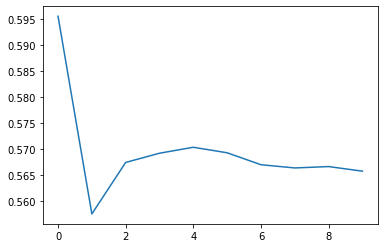

In [28]:
res_tf_cosine = np.array([np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=i+1, metric="cosine"), X_tfidf, target, cv=3)) for i in range(10)])
print(res_tf_cosine)
print("The best: ", res_tf_cosine.argmax() + 1)
plt.plot(res_tf_cosine)
plt.show()

##### Лучший результат получился при использовании Tfidf векторизации вместе с косинусной метрикой.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [29]:
newsgroups_test = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [30]:
data_test = newsgroups_test['data']
target_test = newsgroups_test['target']

In [31]:
test_vectorizer = TfidfVectorizer()
X_test = test_vectorizer.fit_transform(data_test)

[0.56492125 0.530932   0.53889817 0.54646599 0.55668884 0.55961001
 0.56067227 0.55814988 0.55974393 0.56027434]
The best:  1


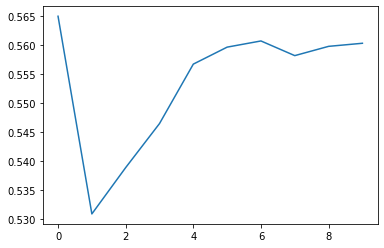

In [32]:
res_test = np.array([np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=i+1, metric="cosine"), X_test, target_test, cv=3)) for i in range(10)])
print(res_test)
print("The best: ", res_test.argmax() + 1)
plt.plot(res_test)
plt.show()

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.